# 贝叶斯决策论和朴素贝叶斯分类器

徐迪深 浙江工商大学 金融学院 CFA1901

## 贝叶斯决策论

​周末和朋友在一个大型商业综合体逛街吃饭，选择太多了，去吃什么好呢？好朋友聚在一起不容易，因此吃饭的选择会比较重要。如何选择呢？大家会提出各自建议：选一个口味符合的，选一个装修漂亮的，选一个生意兴旺的，选一个在美团上有很多介绍的，选一个有朋友去过的，诸如此类的建议你肯定需要尽可能的采纳，而且希望得到一个完美的交集。但是显然把所有的建议都遍历一遍的话，估计大家都不等不到吃饭了，而且你能找到收集全所有的建议吗？显然不能。但是选择还是要做的，饭总归要吃的。因此我们的决策是**基于一个不完备的信息集的**。此外，我们的决策过程是将有效的建议，一个一个根据重要性来尝试的，比如，我们认为一个好的餐馆，第一个也是最重要的特征是在网络平台上有好口碑，第二个次重要的特征是当天的生意好、客人多，第三重要的是我们当中有人去过的...... **我们的决策是一个不断的，但同时是有序的数据采集和信息分析的过程**。

我们知道生活中绝大多数决策面临的信息都是不全的，我们只有有限的信息。在无法得到全面的信息的情况下，我们就在信息有限的情况下，尽可能做出一个好的预测。这个每天都在进行的过程就是大名鼎鼎的贝叶斯理论(Bayes theorem)，或者是贝叶斯推断(Bayes inference)，贝叶斯法则(Bayes rule).


现在可以设想一个场景。

假如你想要去学校附近的宝龙广场的一个餐馆a吃饭。你去查看了网络上对这家餐馆的介绍，比如口味，装修，去的人多不多，想根据这些信息判断这个餐馆好不好。那么在贝叶斯决策论中，我们将诸如**口味，装修，去的人多不多**这些信息称为特征，而餐馆**好**和**不好**称为类别。

一个餐馆的口味，装修，去的人多不多都是餐馆的公开信息。那么基于这些信息，餐馆a是好餐馆（不好的餐馆也一样）的概率可以用条件概率表示：

$$
P(好餐馆|口味，装修，客人的多少)\qquad(1)
$$

$(1)$式可以用贝叶斯公式展开，有

$$
P(好餐馆|口味，装修，客人的多少)=P(好餐馆)\frac{P(口味，装修，客流量|好餐馆)}{P(口味，装修，客人的多少)}\qquad(2)
$$

显然我们希望$(1)$能越大越好。

而将$(1)$得到$(2)$之后，可以发现$𝑃(好餐馆)$（我们也称为先验（prior）概率）是一个固定的值，同理，$P(口味，装修，客人的多少)$也是常数。在实际计算中，我们可以根据大数定理，用频率来估计概率。

所以当$𝑃(口味，装修，客人的多少|好餐馆)$最大时，$(1)$也会最大。$𝑃(口味，装修，客流量|好餐馆)$这个我们叫做似然（likelihood）概率。而最大化似然概率我们最常用的就是极大似然估计。

$(2)$也给了我们一个启示：

$$
\frac{P(口味，装修，客人的多少|好餐馆)}{P(口味，装修，客流量)}\qquad(3)
$$

假如$(3)$能够大于1，就意味着比起我们的总体样本，那就意味着这一类餐馆更有可能是好餐馆。

### 极大似然估计

回到上面一节我们的思路：想要$P(好餐馆|口味，装修，客人的多少)$更大，那么$P(口味，装修，客人的多少|好餐馆)$就要更大

现在的问题是如何最大化似然概率。我们常用的方法就是极大似然估计。

以极大似然估计$P(口味，装修，客人的多少|好餐馆)$为例。

现在你在网上看到了N个人对于餐馆的评论，我们对每个人标记为$x_i$($i \in N$),其中$x_i$={$口味=偏咸/偏甜，装修=豪华/简单，客流量=多/少$}，以及每个人的评价$y_i$={$好/不好$}（$i \in N$）

那么，就可以由这些人的评论得到如下一组概率

$$
P([口味=偏甜/偏咸，装修=豪华/简单，客流量=多/少]的各种情况的组合|y=好餐馆)
$$

实际上最后就是想找到一个最符合好餐厅的特征（例如我喜欢口味偏咸，装修简单，客流量少的餐厅，那么对于我来说$P(口味=咸，装修=简单，客流量=少|好参观)$这个概率就是最大的似然概率）

## 朴素贝叶斯分类器

贝叶斯分类器有很多种，而朴素贝叶斯分类器是在所有特征都独立的假设进行分类的一种算法。至于为什么要做独立的假设（往往这个假设并不符合实际），是因为独立的假设使得计算简单很多，而对于预测的准确程度又不会损失到不能接受的程度。

那么，上面的$(2)$式就可以写成

$$
P(好餐馆|口味，装修，客人的多少)=P(好餐馆)\frac{P(口味|好餐馆)P(装修|好餐馆)P(客流量|好餐馆)}{P(口味)P(装修)P(客人的多少)}\qquad(5)
$$

这样比起原来的式子，明显计算方面简单许多。但是，贝叶斯分类器也并不是只有朴素贝叶斯分类器一种，还有一类半朴素贝叶斯分类器，相对朴素的假设则放宽了许多，精度提高的同时计算也更加复杂。分类器的选用具体要根据任务的要求和背景决定

### 拉普拉斯修正

有时候我们会遇到这样的情况。

还是以判断餐馆a的好坏为例：你现在拿到了网上各个网友对餐馆a的口味，装修，客流量和对餐馆a的评价（好或者不好），但是你还多关注了一个特征：是否有音乐。但网上评价的人并不在意这个，所以没有人提起这个餐馆有没有音乐。于是有一个特征的特征值都缺失了。那么你在具体计算先验概率和似然概率甚至在计算贝叶斯公式中的分母（$P(音乐)$）的时候，这个概率为0（但分母肯定不可以为0）。

你可以选择丢弃这个特征。但是你仍然很在意这个餐厅是否有音乐，所以并不想丢弃，那么该如何解决这个问题？

拉普拉斯修正就是一个解决方法。

拉普拉斯修正核心要保证的点是两个：第一个是让计算不违背数学的基本规律，第二个是不能让修正后的概率和修正之前有不可接受的差异（比如修正前我们的$P(音乐)$为0但修正后突然增加到0.8，这样会使得结果产生重大误差。）

具体做法如下：

还是以我们上面要判断餐馆a的好坏为例。其实在你的训练样本足够大的情况下，我们原来的对音乐取餐厅好坏的条件的似然概率计算是这样的：

$$
P(音乐=有|餐厅=好)=\frac{有音乐且为好餐厅的个数=0}{好餐厅的个数}=0
$$

那么拉普拉斯修正就可以这样修正：

$$
P'(音乐=有|餐厅=好)=\frac{有音乐且为好餐厅的个数+1}{好餐厅的个数+音乐这个特征的取值（有/无，所以是2）}\neq 0
$$

然而拉普拉斯修正还不能改变信息集本身的特点。举个例子，假如你没有做拉普拉斯修正之前，你调查到的信息表示宝龙广场的特点是口味偏咸，装修简单，客流量大和没有音乐的餐馆更有可能是好餐馆，然而修正之后信息反应的是口味偏甜，装修豪华的，客流量小且有音乐的餐馆更有可能是好餐馆，那么显然这个修正是一个很失败的修正。

所以既然上面音乐对餐厅好坏取条件的似然概率做了修正，那么其它特征都要相应做修正。

先验概率的修正：
$$
P'(餐厅=好)=\frac{好餐厅的个数+1}{所有餐厅的个数+所有特征的个数（口味，装修，客流量，音乐所以总共4个）}
$$

似然概率的修正，以口味的似然概率为例：

$$
P'(口味=偏咸|餐厅=好)=\frac{口味偏咸且是好餐厅的个数+1}{好餐厅的个数+口味这个特征可能取值的个数（偏咸/偏甜，所以是2）}
$$

这样就能保证不舍弃音乐这个特征，且不改变原来训练样本（经验）的信息情况下，对目标进行分类（预测）

## 贝叶斯分类器在金融的应用：运用财务指标对上市公司的质量进行判断

我国在1998年在A股市场实行了特别风险提示（Special Treatment）制度来完善我国股市在对于财务状况不佳或其他经营状况不佳的上市公司的处理制度。对于连续两个财年利润为负或者其它经营状况不佳的情况的上市公司，证监会要求这类上市公司，其股票名称要在前面冠名"ST"并单独披露信息，每日股价涨跌幅限制在±5%。

E.Altman（1986）对美国的破产清算的上市公司进行研究提出了基于财务指标的用于判断上市公司是否可能在未来陷入财务困境的Z值模型。我们可以通过python程序来编写一个朴素贝叶斯分类器来观察朴素贝叶斯分类器在判断我国上市困境的财务困境是否拥有更好的预测效果。

In [36]:
import pandas as pd

In [37]:
def get_data(name,file='.xlsx'):
    return pd.read_excel(name+file)
#我们可以用pandas导入我们的数据
#这里我们选取了2011到2012年的ST公司和与其类似的财务状况良好的上市公司
df = get_data('df')
df.head()

,证券代码,证券名称,X1,X2,X3,X4,X5,Z值,描述,类别
0,600077.SH,宋都股份,中,高,高,很低,很低,5.9789,良好,ST
1,600091.SH,*ST明科,低,高,高,很低,很低,-1.0051,堪忧,ST
2,600131.SH,国网信通,低,高,高,很低,很低,1.4975,堪忧,ST
3,600145.SH,*ST新亿,中,高,高,很低,很低,3.3578,良好,ST
4,600179.SH,安通控股,低,高,高,很低,很低,1.3321,堪忧,ST


在这我们特别说明一下X1到X5分别是什么：
X1：净营运资本 / 总资产
X2：留存收益 / 总资产
X3：息税前收益/ 总资产 
X4：优先股和普通股市值 /总负债
X5：销售额 / 总资产

在原来的Z值模型中每一个财务指标都是一个类型为浮点数的数值，不过我们将每一个特征的数值根据大小划分为4个区间，得到了上面的表格。

In [38]:
print(len(df))#显示我们的样本总量

324


In [39]:
a = {1:2,3:4}
sum(a.values())

6

In [40]:
#编写朴素贝叶斯分类器
class naive_bayes_classifier(object):
    
    def __init__(self,feature_name_list,features,labels,label_name,df,laplacian):
        #我们依次输入含有所有特征名称的列表，所有类别的列表，类别所在列的名称，和我们导入的数据
        self.feature_name_list = feature_name_list
        self.features = features
        self.labels = labels
        self.data = df
        self.label_name = label_name
        self.likelihood = None
        self.prior_probability = None
        self.one = None
        self.laplacian = laplacian
    
    #计算先验概率
    def compute_prior_probability(self):
        prior_probability = {}
        classes = self.data[self.label_name]
        for name in self.labels:
            prior_probability[name] = (len(classes[classes == name])+1*self.laplacian)/(len(self.data)+self.laplacian*len(classes))
        print(prior_probability)
        self.prior_probability = prior_probability  #先验概率的计算在实际应用中并不复杂
                                                      #就是看每个类别在样本中的频率
    
    #计算似然概率
    def compute_likelihood(self): 
        likelihood = {}
        for feature_name in self.feature_name_list:
            likelihood[feature_name] = {}
            for feature in self.features:
                likelihood[feature_name][feature] = {}
                for label in self.labels:
                    data = df[[feature_name,label_name]]
                    #因为我们就需要看一个特征相对于类别的似然概率，自然将特征列和类别列单独拿出会方便很多
                    likelihood_nemerator = len(data[(data[feature_name] == feature)&(data[label_name] == label)])+self.laplacian*1
                    #这里计算的就是似然概率的分子，计算符合某一个特征且符合某一个类别的样本个数
                    likelihood_denominator = len(data[data[label_name] == label])+self.laplacian*len(df[feature_name].unique())
                    #这里就是计算分母，计算符合某一个特征的个数
                    likelihood[feature_name][feature][label] = likelihood_nemerator/likelihood_denominator
        self.likelihood = likelihood
        print(likelihood)
        #程序的思路是这样：我们想要计算的就是条件概率：如P(X1，ST)/P（ST），我们实际上要做的就是先找出所有公司中的ST的公司
        #记录个数（函数len（））
        #然后在找出来的公司记录X1很低，低，中，高的公司分别有多少个
        #然后相除就可以得到这个条件概率了
        
    def predict(self,target):
        score = self.prior_probability.copy()
        for key1 in score.keys():
            for key2 in target.keys():
                for value in target.values():
                    score[key1] *= self.likelihood[key2][value][key1]#贝叶斯如果目的是为了做预测，那么实际上判断贝叶斯公式的大小就可以撸
        for key in score.keys():
            score[key] = score[key]/sum(score.values())#然而为了能给使用者更直观的感受，我们这里进行归一化让结果以概率的方式展现
        print(score)
        if score['ST']>score['非ST']:#做比较，朴素贝叶斯分类器会建议概率更大的类别
            result = 'ST'
        else:
            result = '非ST'
        return result

In [41]:
#现在对我们的朴素贝叶斯分类器进行训练
features = ['很低','低','中','高']#我们样本中所有的特征值
labels = ['ST','非ST']#我们所有的类别
label_name = '类别'#类别那一列我们取的名字就叫“类别”
feature_name_list = list(df.columns[2:7])#我们的表格中，取出我们要训练的特征列的列名

#输入参数
bayes = naive_bayes_classifier(feature_name_list,features,labels,label_name,df,True)
bayes.compute_prior_probability()
bayes.compute_likelihood()

{'ST': 0.24382716049382716, '非ST': 0.25925925925925924}
{'X1': {'很低': {'ST': 0.012422360248447204, '非ST': 0.005847953216374269}, '低': {'ST': 0.4906832298136646, '非ST': 0.08187134502923976}, '中': {'ST': 0.422360248447205, '非ST': 0.672514619883041}, '高': {'ST': 0.07453416149068323, '非ST': 0.23976608187134502}}, 'X2': {'很低': {'ST': 0.012578616352201259, '非ST': 0.005917159763313609}, '低': {'ST': 0.006289308176100629, '非ST': 0.005917159763313609}, '中': {'ST': 0.006289308176100629, '非ST': 0.005917159763313609}, '高': {'ST': 0.9874213836477987, '非ST': 0.9940828402366864}}, 'X3': {'很低': {'ST': 0.012422360248447204, '非ST': 0.005847953216374269}, '低': {'ST': 0.012422360248447204, '非ST': 0.005847953216374269}, '中': {'ST': 0.012422360248447204, '非ST': 0.005847953216374269}, '高': {'ST': 0.9627329192546584, '非ST': 0.9824561403508771}}, 'X4': {'很低': {'ST': 0.9875, '非ST': 0.9705882352941176}, '低': {'ST': 0.00625, '非ST': 0.01764705882352941}, '中': {'ST': 0.00625, '非ST': 0.0058823529411764705}, '高': {'ST

In [42]:
#我们从同花顺上2016年的ST股票
#下载了对应的z值模型数据来看朴素贝叶斯分类器和z值模型在预测我国上市公司财务困境上的效果
ST_test = pd.read_excel('2016的ST.xlsx')
ST_test.head()

,证券代码,证券名称,X1,X2,X3,X4,X5,Z值,Z值结果描述
0,600179.SH,安通控股,很低,高,中,很低,低,0.5353,堪忧
1,600212.SH,江泉实业,中,高,低,低,很低,45.6857,良好
2,600230.SH,沧州大化,低,高,中,很低,很低,0.7445,堪忧
3,600234.SH,山水文化,很低,高,高,很低,很低,4.0062,良好
4,600306.SH,*ST商城,很低,高,高,很低,低,0.6890,堪忧


In [43]:
len(ST_test)#测试集的数量

52

In [44]:
not_ST_test = pd.read_excel('2016非ST.xlsx')
not_ST_test.head()

,证券代码,证券名称,X1,X2,X3,X4,X5,Z值,Z值结果描述
0,600009.SH,上海机场,中,高,很低,中,很低,3.5902,良好
1,600010.SH,包钢股份,低,很低,低,很低,低,0.5770,堪忧
2,600011.SH,华能国际,很低,很低,低,很低,低,0.2099,堪忧
3,600018.SH,上港集团,中,高,低,很低,很低,1.9424,不稳定
4,600019.SH,宝钢股份,低,中,低,很低,中,1.4634,堪忧


In [45]:
len(not_ST_test)

26

In [46]:
#将第二行的数据方进去预测，这一个样本Z值的预测是错误的
target = {'X1':'中','X2':'高','X3':'低','X4':'低','X5':'很低'}#可以根据上面给出的数据换一些测试样本进行测试
bayes.predict(target)
#结果可以看到原本Z值判断错误的样本在朴素贝叶斯分类器下能得到和实际相符的预测结果

{'ST': 0.9861517513360121, '非ST': 4.820988041540812e-38}


'ST'

In [47]:
#建立一个字典存入所有的测试样本
test_samples = {}
for code in ST_test['证券代码']:
    test_samples[code] = {}
    for key in ST_test.columns[2:7]:
        test_samples[code][key] = ST_test[ST_test['证券代码']==code][key].values[0]
#print(test_samples)

In [48]:
#建立一个循环看看我们的训练效果
p = 0
for code in test_samples.keys():
    if bayes.predict(test_samples[code])=='ST':
        p += 1 
    bayes.predict(test_samples[code])
    print('-------------------------------')
print(str(p/len(ST_test)*100)+'%')

{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
-------------------------------
{'ST': 0.9861517513360121, '非ST': 4.820988041540812e-38}
{'ST': 0.9861517513360121, '非ST': 4.820988041540812e-38}
-------------------------------
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
-------------------------------
{'ST': 0.9954401503424567, '非ST': 3.3882449979610928e-31}
{'ST': 0.9954401503424567, '非ST': 3.3882449979610928e-31}
-------------------------------
{'ST': 0.9918817517836194, '非ST': 1.0456386845409722e-32}
{'ST': 0.9918817517836194, '非ST': 1.0456386845409722e-32}
-------------------------------
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
-------------------------------
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36}
{'ST': 0.9922019837006095, '非ST': 1.5582176908300182e-36

In [49]:
test_samples = {}
for code in not_ST_test['证券代码']:
    test_samples[code] = {}
    for key in not_ST_test.columns[2:7]:
        test_samples[code][key] = not_ST_test[not_ST_test['证券代码']==code][key].values[0]
#print(test_samples)

In [50]:
p = 0
for code in test_samples.keys():
    if bayes.predict(test_samples[code])=='非ST':
        p += 1 
    bayes.predict(test_samples[code])
    print('-------------------------------')
print(str(p/len(ST_test)*100)+'%')

{'ST': 0.926639241250723, '非ST': 7.614034380831885e-37}
{'ST': 0.926639241250723, '非ST': 7.614034380831885e-37}
-------------------------------
{'ST': 0.9999256304399825, '非ST': 1.1067578251246059e-39}
{'ST': 0.9999256304399825, '非ST': 1.1067578251246059e-39}
-------------------------------
{'ST': 0.9999583761374351, '非ST': 3.5990410178470675e-38}
{'ST': 0.9999583761374351, '非ST': 3.5990410178470675e-38}
-------------------------------
{'ST': 0.9922019837006095, '非ST': 1.558217690830018e-36}
{'ST': 0.9922019837006095, '非ST': 1.558217690830018e-36}
-------------------------------
{'ST': 0.9866949766114896, '非ST': 7.182631182542894e-42}
{'ST': 0.9866949766114896, '非ST': 7.182631182542894e-42}
-------------------------------
{'ST': 0.9999583761374351, '非ST': 3.599041017847067e-38}
{'ST': 0.9999583761374351, '非ST': 3.599041017847067e-38}
-------------------------------
{'ST': 0.9861517513360121, '非ST': 4.820988041540812e-38}
{'ST': 0.9861517513360121, '非ST': 4.820988041540812e-38}
--------

贝叶斯的奥秘其实可以用直方图展现出来，利用matplotlib包我们可以做出先验概率和似然概率的图

In [51]:
#以下代码实际上是根据条件对不同特征的公司计数
laplacian = True
likelihood = {}
for feature_name in feature_name_list:
    for feature in features:
        for label in labels:
            tmp_df = df[[feature_name,'类别']]
            likelihood[feature_name+feature+label] = \
            (len(tmp_df[(tmp_df[feature_name]==feature)&(tmp_df['类别']==label)])+laplacian*1)
print(likelihood)

{'X1很低ST': 2, 'X1很低非ST': 1, 'X1低ST': 79, 'X1低非ST': 14, 'X1中ST': 68, 'X1中非ST': 115, 'X1高ST': 12, 'X1高非ST': 41, 'X2很低ST': 2, 'X2很低非ST': 1, 'X2低ST': 1, 'X2低非ST': 1, 'X2中ST': 1, 'X2中非ST': 1, 'X2高ST': 157, 'X2高非ST': 168, 'X3很低ST': 2, 'X3很低非ST': 1, 'X3低ST': 2, 'X3低非ST': 1, 'X3中ST': 2, 'X3中非ST': 1, 'X3高ST': 155, 'X3高非ST': 168, 'X4很低ST': 158, 'X4很低非ST': 165, 'X4低ST': 1, 'X4低非ST': 3, 'X4中ST': 1, 'X4中非ST': 1, 'X4高ST': 1, 'X4高非ST': 2, 'X5很低ST': 138, 'X5很低非ST': 149, 'X5低ST': 19, 'X5低非ST': 18, 'X5中ST': 1, 'X5中非ST': 3, 'X5高ST': 3, 'X5高非ST': 1}


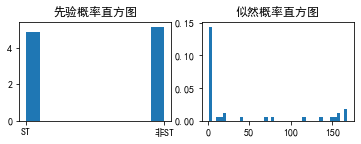

In [52]:
import matplotlib.pyplot as plt

#下面的代码用来显示中文字体
plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False       

fig = plt.figure()
illustration_prior_probability = fig.add_subplot(221)
illustration_prior_probability.hist(df['类别'],density=True)
illustration_prior_probability.set_title('先验概率直方图')

illustration_likelihood = fig.add_subplot(222)
illustration_likelihood.hist(list(likelihood.values()),40,density=True)
illustration_likelihood.set_title('似然概率直方图')

plt.show()

可以看到，先验概率几乎不承载信息，因为先验概率并没有差异；而相对的似然概率则承载了非常多的信息。

实际上我们在获取数据时往往会选择让各个类别的先验概率不要有太大差异。如果先验概率差别很大，1000支股票ST有999个，而非ST只有1个，那么你随机选出的股票只有很小的概率能抽到非ST股票。那么你在训练贝叶斯分类器的时候就意味着它只能学习到单方面的信息，则预测时你的结果几乎都是ST。

而我们希望似然概率能在类别上表现出显著的差异则体现在贝叶斯决策本身对信息更新的特点。其实先验概率就好像你刚刚进入市场，你只知道有两种股票：ST股和非ST股，而当你看到了市场公司中的财报，就相当于获得了新的信息，那么假如ST和非ST公司发布的财报数据没有什么区别，那么这些财报对于你的预测就是完全没有意义的，因为你没有办法从财报中判断一家公司将来的状况了。